<a href="https://colab.research.google.com/github/CarlosFranchN/my_application_ML_StarLog/blob/main/Statlog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

df = statlog_german_credit_data.data.original


In [4]:
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
df.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'class'],
      dtype='object')

In [6]:
df.rename(columns = {'Attribute1' : "Status",
                     'Attribute2' : "Duration(months)",
                     'Attribute3' : "Credit history",
                     'Attribute4' : "Purpose",
                     'Attribute5' : "Credit amount",
                     'Attribute6' : "Savings",
                     'Attribute7' : "Present employment since",
                     'Attribute8' : "Income",
                     'Attribute9' : "Status / gender" ,
                     'Attribute10': "Other debtors",
                     'Attribute11' : "residence since",
                     'Attribute12' : "Property",
                     'Attribute13' : "Age",
                     'Attribute14' : "Plans",
                     'Attribute15' : "Housing",
                     'Attribute16' : "Number of credit card",
                     'Attribute17' : "Job",
                     'Attribute18' : "Peoples liable",
                     'Attribute19' : "Telephone",
                     'Attribute20' : "Foreign worker",

                     }, inplace=True)

In [7]:
df.head()

,Status,Duration(months),Credit history,Purpose,Credit amount,Savings,Present employment since,Income,Status / gender,Other debtors,...,Property,Age,Plans,Housing,Number of credit card,Job,Peoples liable,Telephone,Foreign worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Status                    1000 non-null   object
 1   Duration(months)          1000 non-null   int64 
 2   Credit history            1000 non-null   object
 3   Purpose                   1000 non-null   object
 4   Credit amount             1000 non-null   int64 
 5   Savings                   1000 non-null   object
 6   Present employment since  1000 non-null   object
 7   Income                    1000 non-null   int64 
 8   Status / gender           1000 non-null   object
 9   Other debtors             1000 non-null   object
 10  residence since           1000 non-null   int64 
 11  Property                  1000 non-null   object
 12  Age                       1000 non-null   int64 
 13  Plans                     1000 non-null   object
 14  Housing                  

In [9]:
df[df['Status'] == "A11"]

,Status,Duration(months),Credit history,Purpose,Credit amount,Savings,Present employment since,Income,Status / gender,Other debtors,...,Property,Age,Plans,Housing,Number of credit card,Job,Peoples liable,Telephone,Foreign worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
11,A11,48,A32,A49,4308,A61,A72,3,A92,A101,...,A122,24,A143,A151,1,A173,1,A191,A201,2
13,A11,24,A34,A40,1199,A61,A75,4,A93,A101,...,A123,60,A143,A152,2,A172,1,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,A11,24,A32,A41,6579,A61,A71,4,A93,A101,...,A124,29,A143,A153,1,A174,1,A192,A201,1
992,A11,18,A32,A43,1936,A65,A74,2,A94,A101,...,A123,23,A143,A151,2,A172,1,A191,A201,1
993,A11,36,A32,A42,3959,A61,A71,4,A93,A101,...,A122,30,A143,A152,1,A174,1,A192,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1


In [10]:
from sklearn.preprocessing import LabelEncoder

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV




# Árvores e Ensambles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier

# Boosting
from xgboost import XGBClassifier
# Máquinas de Vetores de Suporte
from sklearn.svm import SVC
# Probabilísticos
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Vizinhos mais próximos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [12]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

# Tratando os dados categoricos

In [13]:
cols_cat = df_cat.columns
cols_cat

Index(['Status', 'Credit history', 'Purpose', 'Savings',
       'Present employment since', 'Status / gender', 'Other debtors',
       'Property', 'Plans', 'Housing', 'Job', 'Telephone', 'Foreign worker'],
      dtype='object')

In [14]:
for col in cols_cat:
  encoder = LabelEncoder()
  df_cat[col] = encoder.fit_transform(df_cat[col])


In [15]:
df_cat.head()

,Status,Credit history,Purpose,Savings,Present employment since,Status / gender,Other debtors,Property,Plans,Housing,Job,Telephone,Foreign worker
0,0,4,4,4,4,2,0,0,2,1,2,1,0
1,1,2,4,0,2,1,0,0,2,1,2,0,0
2,3,4,7,0,3,2,0,0,2,1,1,0,0
3,0,2,3,0,3,2,2,1,2,2,2,0,0
4,0,3,0,0,2,2,0,3,2,2,2,0,0


# Tratamento das colunas numericas

In [16]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Duration(months)       1000 non-null   int64
 1   Credit amount          1000 non-null   int64
 2   Income                 1000 non-null   int64
 3   residence since        1000 non-null   int64
 4   Age                    1000 non-null   int64
 5   Number of credit card  1000 non-null   int64
 6   Peoples liable         1000 non-null   int64
 7   class                  1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [17]:
df_num.describe()

,Duration(months),Credit amount,Income,residence since,Age,Number of credit card,Peoples liable,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [18]:
df_num.head()

,Duration(months),Credit amount,Income,residence since,Age,Number of credit card,Peoples liable,class
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


# Concatenando os DF

In [19]:
df_main = pd.concat([df_cat, df_num], axis=1)

In [20]:
df_main.head()

,Status,Credit history,Purpose,Savings,Present employment since,Status / gender,Other debtors,Property,Plans,Housing,...,Telephone,Foreign worker,Duration(months),Credit amount,Income,residence since,Age,Number of credit card,Peoples liable,class
0,0,4,4,4,4,2,0,0,2,1,...,1,0,6,1169,4,4,67,2,1,1
1,1,2,4,0,2,1,0,0,2,1,...,0,0,48,5951,2,2,22,1,1,2
2,3,4,7,0,3,2,0,0,2,1,...,0,0,12,2096,2,3,49,1,2,1
3,0,2,3,0,3,2,2,1,2,2,...,0,0,42,7882,2,4,45,1,2,1
4,0,3,0,0,2,2,0,3,2,2,...,0,0,24,4870,3,4,53,2,2,2


In [21]:
correlacao = df_main.corr()
correlacao

,Status,Credit history,Purpose,Savings,Present employment since,Status / gender,Other debtors,Property,Plans,Housing,...,Telephone,Foreign worker,Duration(months),Credit amount,Income,residence since,Age,Number of credit card,Peoples liable,class
Status,1.000000,0.192191,0.053223,0.222867,0.106339,0.043261,-0.127737,-0.032260,0.046841,0.022424,...,0.066296,-0.026758,-0.072013,-0.042705,-0.005280,-0.042234,0.059751,0.076005,-0.014145,-0.350847
Credit history,0.192191,1.000000,-0.081634,0.039058,0.138225,0.042171,-0.040676,-0.053777,0.121973,0.062095,...,0.052370,0.013873,-0.077186,-0.059905,0.044375,0.063198,0.147086,0.437066,0.011550,-0.228785
Purpose,0.053223,-0.081634,1.000000,-0.024072,0.024990,-0.003052,-0.032254,-0.031025,-0.039346,-0.019488,...,0.018677,-0.124317,0.096027,-0.030848,0.078224,-0.062927,-0.030654,0.034958,-0.056450,0.001514
Savings,0.222867,0.039058,-0.024072,1.000000,0.120950,0.017349,-0.105069,0.018948,0.001908,0.006505,...,0.087208,0.007095,0.047661,0.064630,0.021993,0.091424,0.084245,-0.021644,0.027514,-0.178943
Present employment since,0.106339,0.138225,0.024990,0.120950,1.000000,0.111278,-0.008116,0.087187,-0.040154,0.111126,...,0.060518,-0.027232,0.057381,-0.008367,0.126161,0.245081,0.256227,0.125791,0.097192,-0.116002
Status / gender,0.043261,0.042171,-0.003052,0.017349,0.111278,1.000000,0.050634,-0.006940,-0.036765,0.099579,...,0.027275,0.065618,0.014789,-0.016091,0.119308,-0.027269,0.007783,0.064672,0.122165,-0.088184
Other debtors,-0.127737,-0.040676,-0.032254,-0.105069,-0.008116,0.050634,1.000000,-0.155450,-0.059023,-0.065889,...,-0.075035,0.117999,-0.024490,-0.027832,-0.011398,-0.025678,-0.029873,-0.025447,0.020400,-0.025137
Property,-0.032260,-0.053777,-0.031025,0.018948,0.087187,-0.006940,-0.155450,1.000000,-0.090033,0.345219,...,0.196802,-0.132462,0.303971,0.311599,0.053391,0.147231,0.072606,-0.007765,0.011872,0.142612
Plans,0.046841,0.121973,-0.039346,0.001908,-0.040154,-0.036765,-0.059023,-0.090033,1.000000,-0.072299,...,-0.019361,0.015211,-0.054884,-0.046008,-0.000983,0.002089,-0.042346,-0.048442,-0.076891,-0.109844
Housing,0.022424,0.062095,-0.019488,0.006505,0.111126,0.099579,-0.065889,0.345219,-0.072299,1.000000,...,0.102410,-0.063582,0.157049,0.135632,0.089405,0.011941,0.301419,0.048591,0.114508,-0.019315


In [22]:
correlacao.sort_values(by='class', ascending=False)['class']

,class
class,1.000000
Duration(months),0.214927
Credit amount,0.154739
Property,0.142612
Income,0.072404
Job,0.032735
residence since,0.002967
Purpose,0.001514
Peoples liable,-0.003015
Housing,-0.019315


# Dropando colunas

In [23]:
df_main.drop(columns=['Peoples liable' , 'Purpose' , 'Other debtors', 'residence since'], inplace = True)

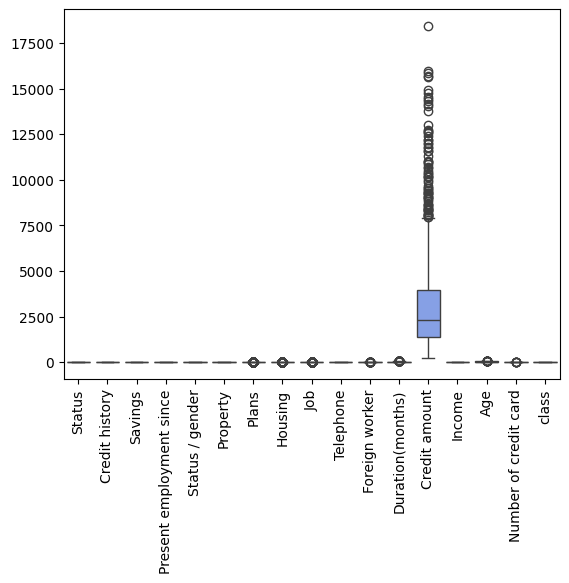

In [24]:
sns.boxplot(data=df_main)
plt.xticks(rotation=90)
plt.show()

In [25]:
def IQR(df,colu):
  col = df[colu]
  Q1 = df[colu].quantile(.25)
  Q3 = df[colu].quantile(.75)
  IQR = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # outliers = df[colu][(df[colu] > limite_inferior) & (df[colu] < limite_superior)]
  return limite_inferior, limite_superior

In [26]:
def retirando_outliers(df,col):
  lim_inf,lim_sup = IQR(df,col)
  df = df[(df[col] > lim_inf) & (df[col] < lim_sup)]
  return df

In [27]:
df_clean = retirando_outliers(df_main , 'Credit amount')

In [28]:
df_clean['class'].value_counts()

,count
class,
1,667
2,261


# SAM

In [29]:
X = df_clean.drop(columns=['class'])
y = df_clean['class']

In [30]:
scaler = StandardScaler()


In [31]:
X_scaled = scaler.fit_transform(X)

In [32]:
from imblearn.over_sampling import RandomOverSampler


In [33]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_scaled, y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, #features
                                                    y_resampled, #target
                                                    test_size=0.25,
                                                    random_state=42,

                                                    )

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)


0.8562874251497006

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.78      0.84       156
           2       0.83      0.92      0.87       178

    accuracy                           0.86       334
   macro avg       0.86      0.85      0.85       334
weighted avg       0.86      0.86      0.86       334



## Teste do Trade-off


In [47]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_recall_curve

In [41]:
cross_val_score(dt, X_train, y_train, cv=5 , scoring='accuracy')

array([0.785, 0.785, 0.81 , 0.805, 0.835])

In [55]:
y_scores = cross_val_predict(dt,
                             X_train,
                             y_train,
                             cv=3,
                             method='predict_proba')

In [68]:
y_score_1 = y_scores[:, 1]
y_score_1

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [62]:
y_train_update = y_train - 1
y_train_update

,class
1188,1
906,0
1018,1
178,1
287,0
...,...
1095,1
1130,1
1294,1
860,0


In [69]:
precisions,recalls,thresholds = precision_recall_curve(y_train_update,
                                                      y_score_1)

In [64]:
def plotar_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

In [65]:
def plotar_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura

    # Plota a curva Precision-Recall
    sns.lineplot(x=recalls, y=precisions, label="Precision vs Recall", color="b", linewidth=2)

    # Ajuste de rótulos e título
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title("Curva Precision-Recall", fontsize=16)

    # Ajustando os limites do gráfico
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # Melhorando a grade
    plt.grid(visible=True, linestyle="--", alpha=0.6)

    # Exibir legenda corretamente
    plt.legend(loc="best", fontsize=12)

    # Mostrar o gráfico
    plt.show()

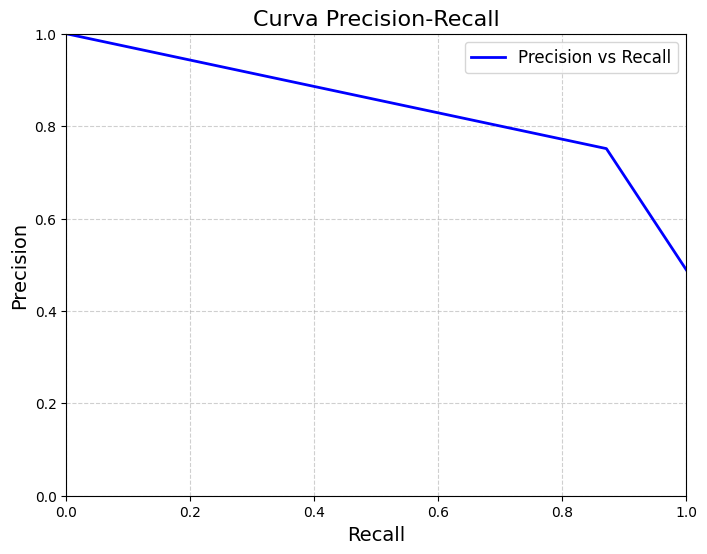

In [70]:
plotar_precision_vs_recall(precisions=precisions,recalls=recalls)

## Aplicando outros modelos

In [73]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

In [74]:
for model in models.values():
  model.fit(X_train,y_train)


In [83]:
results = {}

In [84]:
for model in models.keys():
  y_pred = models[model].predict(X_test)
  # ======================================
  acc = accuracy_score(y_true=y_test , y_pred=y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results[model] = {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1-score": f1}
  # ===============================
  print(model)
  print(acc)
  print(classification_report(y_test, y_pred))
  print("------------------------------------------")

Decision Tree
0.8473053892215568
              precision    recall  f1-score   support

           1       0.88      0.78      0.83       156
           2       0.82      0.91      0.86       178

    accuracy                           0.85       334
   macro avg       0.85      0.84      0.84       334
weighted avg       0.85      0.85      0.85       334

------------------------------------------
Random Forest
0.8922155688622755
              precision    recall  f1-score   support

           1       0.91      0.85      0.88       156
           2       0.88      0.93      0.90       178

    accuracy                           0.89       334
   macro avg       0.89      0.89      0.89       334
weighted avg       0.89      0.89      0.89       334

------------------------------------------
Logistic Regression
0.6946107784431138
              precision    recall  f1-score   support

           1       0.66      0.71      0.68       156
           2       0.73      0.69      0.71   

### Selecionando melhor modelo



#### F1 score


O F1-score é uma boa métrica geral, pois equilibra precisão e recall.

In [88]:
best_model = max(results, key=lambda x: results[x]["F1-score"])
print(f"O melhor modelo pelo F1 Scores foi: {best_model} [{results[best_model]['F1-score']}]")

O melhor modelo pelo F1 Scores foi: Random Forest [0.8807947019867549]


#### Acuracia


In [89]:
best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"O melhor modelo pelo Acuracia foi: {best_model} [{results[best_model]['Accuracy']}]")

O melhor modelo pelo Acuracia foi: Random Forest [0.8922155688622755]


#### Validação Cruzada

In [91]:
for name, model in models.items():
    scores_f1 = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring="f1_weighted")
    print(f"{name}: Média do F1-score: {scores_f1.mean():.4f}")

Decision Tree: Média do F1-score: 0.8481
Random Forest: Média do F1-score: 0.9028
Logistic Regression: Média do F1-score: 0.7068
Support Vector Machine: Média do F1-score: 0.7823
K-Nearest Neighbors: Média do F1-score: 0.7300


In [94]:
for name, model in models.items():
    scores_acc = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring="balanced_accuracy")
    print(f"{name}: Média do Accuracy: {scores_acc.mean():.4f}")

Decision Tree: Média do Accuracy: 0.8477
Random Forest: Média do Accuracy: 0.9077
Logistic Regression: Média do Accuracy: 0.7069
Support Vector Machine: Média do Accuracy: 0.7826
K-Nearest Neighbors: Média do Accuracy: 0.7309


### Ajustando Hiperparametros

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [96]:
best_model = {}

In [97]:
param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": np.logspace(-4, 4, 10),
        "solver": ["liblinear", "lbfgs"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": range(1, 21),
        "weights": ["uniform", "distance"]
    }
}

In [99]:
for name,model in models.items():
  print(f"Tuning {name}...")
  search = RandomizedSearchCV(model,param_grids[name],cv=5,scoring='f1_weighted')
  search.fit(X_train,y_train)

  best_model[name] = search.best_estimator_
  print(f"Melhores parâmetros para {name}: {search.best_params_}\n")

Tuning Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para Decision Tree: {'max_depth': None, 'criterion': 'entropy'}

Tuning Random Forest...
Melhores parâmetros para Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

Tuning Logistic Regression...
Melhores parâmetros para Logistic Regression: {'solver': 'lbfgs', 'C': 0.046415888336127774}

Tuning Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores parâmetros para Support Vector Machine: {'kernel': 'rbf', 'C': 100}

Tuning K-Nearest Neighbors...
Melhores parâmetros para K-Nearest Neighbors: {'weights': 'distance', 'n_neighbors': 17}



In [100]:
results_tuned = {}

In [101]:
for name, model in best_model.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_tuned[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

In [102]:
for model, scores in results_tuned.items():
    print(f"{model}: {scores}")


Decision Tree: {'Accuracy': 0.8293413173652695, 'Precision': 0.8721804511278195, 'Recall': 0.7435897435897436, 'F1-score': 0.8027681660899654}
Random Forest: {'Accuracy': 0.8922155688622755, 'Precision': 0.9054054054054054, 'Recall': 0.8589743589743589, 'F1-score': 0.881578947368421}
Logistic Regression: {'Accuracy': 0.7065868263473054, 'Precision': 0.676829268292683, 'Recall': 0.7115384615384616, 'F1-score': 0.69375}
Support Vector Machine: {'Accuracy': 0.8473053892215568, 'Precision': 0.8723404255319149, 'Recall': 0.7884615384615384, 'F1-score': 0.8282828282828283}
K-Nearest Neighbors: {'Accuracy': 0.8143712574850299, 'Precision': 0.9272727272727272, 'Recall': 0.6538461538461539, 'F1-score': 0.7669172932330827}


In [104]:
for name, model in best_model.items():
    scores_f1 = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring="f1_weighted")
    print(f"{name}: Média do F1-score: {scores_f1.mean():.4f}")

Decision Tree: Média do F1-score: 0.8591
Random Forest: Média do F1-score: 0.9036
Logistic Regression: Média do F1-score: 0.7113
Support Vector Machine: Média do F1-score: 0.8568
K-Nearest Neighbors: Média do F1-score: 0.8190


In [105]:
for name, model in best_model.items():
    scores_acc = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring="balanced_accuracy")
    print(f"{name}: Média do Accuracy: {scores_acc.mean():.4f}")

Decision Tree: Média do Accuracy: 0.8643
Random Forest: Média do Accuracy: 0.9055
Logistic Regression: Média do Accuracy: 0.7115
Support Vector Machine: Média do Accuracy: 0.8582
K-Nearest Neighbors: Média do Accuracy: 0.8230


In [109]:
for name, model in best_model.items():
    y_pred = model.predict(X_test)
    print(f"{name}:\n {classification_report(y_test, y_pred)}")
    print("======================================================")

Decision Tree:
               precision    recall  f1-score   support

           1       0.87      0.74      0.80       156
           2       0.80      0.90      0.85       178

    accuracy                           0.83       334
   macro avg       0.84      0.82      0.83       334
weighted avg       0.83      0.83      0.83       334

Random Forest:
               precision    recall  f1-score   support

           1       0.91      0.86      0.88       156
           2       0.88      0.92      0.90       178

    accuracy                           0.89       334
   macro avg       0.89      0.89      0.89       334
weighted avg       0.89      0.89      0.89       334

Logistic Regression:
               precision    recall  f1-score   support

           1       0.68      0.71      0.69       156
           2       0.74      0.70      0.72       178

    accuracy                           0.71       334
   macro avg       0.71      0.71      0.71       334
weighted avg       0